# Genpact Machine Learning Hackathon
Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:

Historical data of demand for a product-center combination (Weeks: 1 to 145) Product(Meal) features such as category, sub-category, current price and discount Information for fulfillment center like center area, city information etc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
df_train = pd.read_csv('Downloads/train.csv')
df_test = pd.read_csv('Downloads/test.csv')

In [4]:
m_info = pd.read_csv('Downloads/meal_info.csv')
f_center = pd.read_csv('Downloads/fulfilment_center_info.csv')

In [5]:
import pandas as pd  

# Load the CSV files into DataFrames  
df1 = pd.read_csv('Downloads/train.csv')  
df2 = pd.read_csv('Downloads/meal_info.csv')  

# Use the join method (assuming index-based joining)  
df_train = df1.join(df2, lsuffix='_df1', rsuffix='_df2', how='inner')  # Adjust the 'how' parameter as needed  


In [6]:
import pandas as pd  

# Load the CSV files into DataFrames  
df1 = pd.read_csv('Downloads/train.csv')  
df2 = pd.read_csv('Downloads/fulfilment_center_info.csv')  

# Use the join method (assuming index-based joining)  
df_train = df1.join(df2, lsuffix='_df1', rsuffix='_df2', how='inner')  # Adjust the 'how' parameter as needed  


In [7]:
df_train

,id,week,center_id_df1,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,center_id_df2,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,11,679,56,TYPE_A,3.7
1,1466964,1,55,1993,136.83,135.83,0,0,270,13,590,56,TYPE_B,6.7
2,1346989,1,55,2539,134.86,135.86,0,0,189,124,590,56,TYPE_C,4.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,66,648,34,TYPE_A,4.1
4,1448490,1,55,2631,243.50,242.50,0,0,40,94,632,34,TYPE_C,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1166775,1,24,1525,244.50,281.33,0,0,487,53,590,56,TYPE_A,3.8
73,1382473,1,24,2704,244.50,280.33,0,0,243,30,604,56,TYPE_A,3.5
74,1051179,1,24,2492,387.03,388.03,0,0,81,76,614,85,TYPE_A,3.0
75,1220763,1,24,1543,484.03,484.03,0,0,107,68,676,34,TYPE_B,4.1


In [8]:
import pandas as pd  

# Load the CSV files into DataFrames  
df1 = pd.read_csv('Downloads/test.csv')  
df2 = pd.read_csv('Downloads/meal_info.csv')  

# Use the join method (assuming index-based joining)  
df_test = df1.join(df2, lsuffix='_df1', rsuffix='_df2', how='inner') 


In [9]:
import pandas as pd  

# Load the CSV files into DataFrames  
df1 = pd.read_csv('Downloads/test.csv')  
df2 = pd.read_csv('Downloads/fulfilment_center_info.csv')  

# Use the join method (assuming index-based joining)  
df_test = df1.join(df2, lsuffix='_df1', rsuffix='_df2', how='inner')  

In [10]:
df_test

,id,week,center_id_df1,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,center_id_df2,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,11,679,56,TYPE_A,3.7
1,1127204,146,55,1993,160.11,159.11,0,0,13,590,56,TYPE_B,6.7
2,1212707,146,55,2539,157.14,159.14,0,0,124,590,56,TYPE_C,4.0
3,1082698,146,55,2631,162.02,162.02,0,0,66,648,34,TYPE_A,4.1
4,1400926,146,55,1248,163.93,163.93,0,0,94,632,34,TYPE_C,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1196334,146,24,2760,162.99,241.53,0,1,53,590,56,TYPE_A,3.8
73,1349533,146,24,1525,320.13,320.13,0,0,30,604,56,TYPE_A,3.5
74,1463406,146,24,2704,319.13,321.13,0,0,76,614,85,TYPE_A,3.0
75,1447686,146,24,1543,486.03,484.03,0,0,68,676,34,TYPE_B,4.1


In [11]:
df_train.shape

(77, 14)

In [12]:
df_test.shape

(77, 13)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     77 non-null     int64  
 1   week                   77 non-null     int64  
 2   center_id_df1          77 non-null     int64  
 3   meal_id                77 non-null     int64  
 4   checkout_price         77 non-null     float64
 5   base_price             77 non-null     float64
 6   emailer_for_promotion  77 non-null     int64  
 7   homepage_featured      77 non-null     int64  
 8   num_orders             77 non-null     int64  
 9   center_id_df2          77 non-null     int64  
 10  city_code              77 non-null     int64  
 11  region_code            77 non-null     int64  
 12  center_type            77 non-null     object 
 13  op_area                77 non-null     float64
dtypes: float64(3), int64(10), object(1)
memory usage: 9.0+ KB


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 0 to 76
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     77 non-null     int64  
 1   week                   77 non-null     int64  
 2   center_id_df1          77 non-null     int64  
 3   meal_id                77 non-null     int64  
 4   checkout_price         77 non-null     float64
 5   base_price             77 non-null     float64
 6   emailer_for_promotion  77 non-null     int64  
 7   homepage_featured      77 non-null     int64  
 8   center_id_df2          77 non-null     int64  
 9   city_code              77 non-null     int64  
 10  region_code            77 non-null     int64  
 11  center_type            77 non-null     object 
 12  op_area                77 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.4+ KB


In [15]:
# Checking Duplicated Rows

In [16]:
df_train.duplicated().sum()

0

In [17]:
df_test.duplicated().sum()

0

In [18]:
# Checking missing values

In [19]:
df_train.isna().sum()

id                       0
week                     0
center_id_df1            0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
center_id_df2            0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [20]:
df_test.isna().sum()

id                       0
week                     0
center_id_df1            0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
center_id_df2            0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [21]:
# No duplicate rows and no missing values were found

In [22]:
df_train = df_train.drop(['id'],axis=1)
df_test = df_test.drop(['id'],axis=1)

In [23]:
num_df = df_train.select_dtypes(include=['number'])
cat_df = df_train.select_dtypes(include=['object'])

In [24]:
num_df_test = df_test.select_dtypes(include=['number'])
cat_df_test = df_test.select_dtypes(include=['object'])

In [25]:
num_cols = num_df.columns.tolist()
cat_cols = cat_df.columns.tolist()
print("Numerical columns:",num_cols)
print("Categorical columns:",cat_cols)

num_cols_test = num_df_test.columns.tolist()
cat_cols_test = cat_df_test.columns.tolist()
print("Numerical columns of test data:",num_cols_test)
print("Categorical columns of test data:",cat_cols_test)

Numerical columns: ['week', 'center_id_df1', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'center_id_df2', 'city_code', 'region_code', 'op_area']
Categorical columns: ['center_type']
Numerical columns of test data: ['week', 'center_id_df1', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'center_id_df2', 'city_code', 'region_code', 'op_area']
Categorical columns of test data: ['center_type']


In [26]:
df_train.describe()

,week,center_id_df1,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,center_id_df2,city_code,region_code,op_area
count,77.0,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,1.0,37.285714,1966.038961,324.392208,349.520519,0.129870,0.090909,305.545455,83.142857,600.662338,56.493506,3.985714
std,0.0,15.441619,535.156137,146.973876,148.187695,0.338365,0.289365,326.509835,46.090219,66.720274,18.126473,1.106406
min,1.0,24.000000,1062.000000,117.400000,135.830000,0.000000,0.000000,13.000000,10.000000,456.000000,23.000000,0.900000
25%,1.0,24.000000,1525.000000,243.470000,248.350000,0.000000,0.000000,55.000000,50.000000,553.000000,34.000000,3.500000
50%,1.0,24.000000,1962.000000,282.330000,301.730000,0.000000,0.000000,188.000000,77.000000,596.000000,56.000000,3.900000
75%,1.0,55.000000,2444.000000,389.030000,446.230000,0.000000,0.000000,419.000000,110.000000,651.000000,77.000000,4.400000
max,1.0,55.000000,2867.000000,628.620000,627.620000,1.000000,1.000000,1498.000000,186.000000,713.000000,93.000000,7.000000


In [27]:
df_test.describe()

,week,center_id_df1,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,center_id_df2,city_code,region_code,op_area
count,77.0,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,146.0,38.090909,2004.311688,349.390260,355.416104,0.012987,0.038961,83.142857,600.662338,56.493506,3.985714
std,0.0,15.537037,558.643900,158.149021,154.018761,0.113961,0.194771,46.090219,66.720274,18.126473,1.106406
min,146.0,24.000000,1062.000000,135.800000,157.140000,0.000000,0.000000,10.000000,456.000000,23.000000,0.900000
25%,146.0,24.000000,1543.000000,195.000000,228.010000,0.000000,0.000000,50.000000,553.000000,34.000000,3.500000
50%,146.0,24.000000,1962.000000,320.130000,321.130000,0.000000,0.000000,77.000000,596.000000,56.000000,3.900000
75%,146.0,55.000000,2539.000000,447.230000,464.630000,0.000000,0.000000,110.000000,651.000000,77.000000,4.400000
max,146.0,55.000000,2956.000000,728.530000,728.530000,1.000000,1.000000,186.000000,713.000000,93.000000,7.000000


In [28]:
# for checking correlation of data

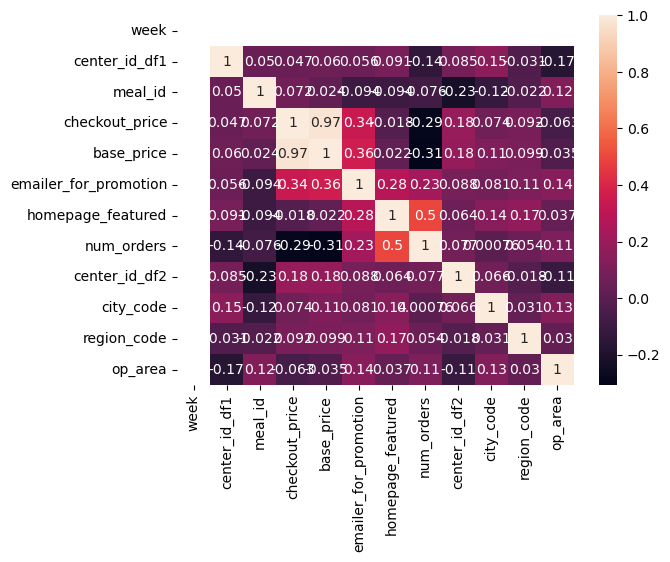

In [29]:
sns.heatmap(num_df.corr(),annot=True)
plt.show()

In [30]:
# for checking skewness of data

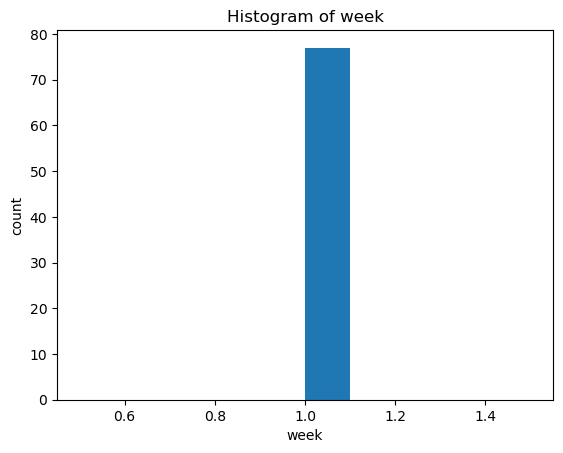

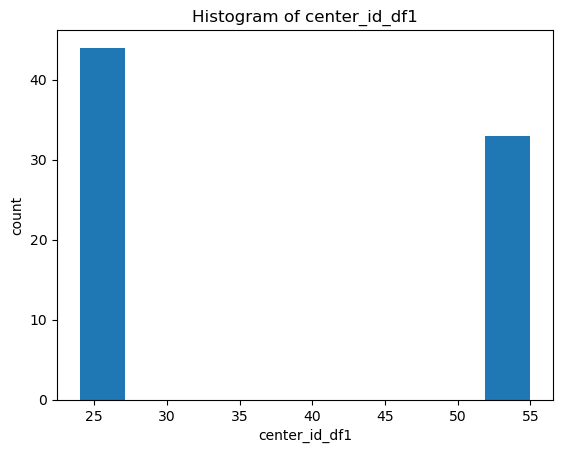

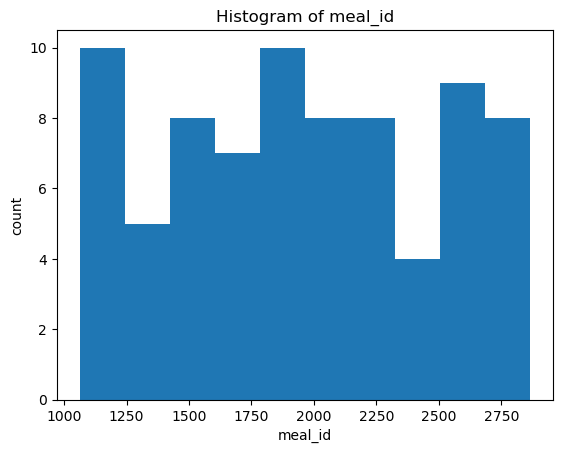

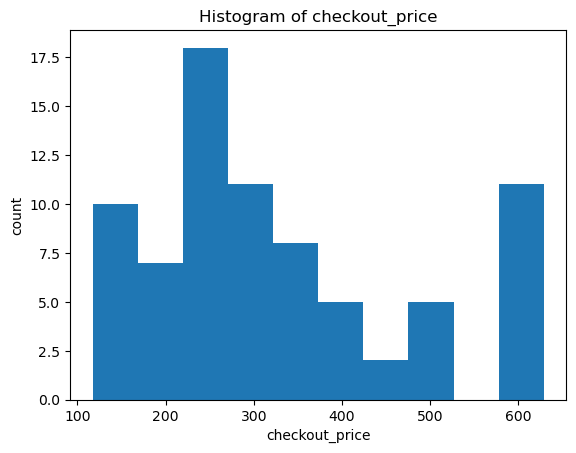

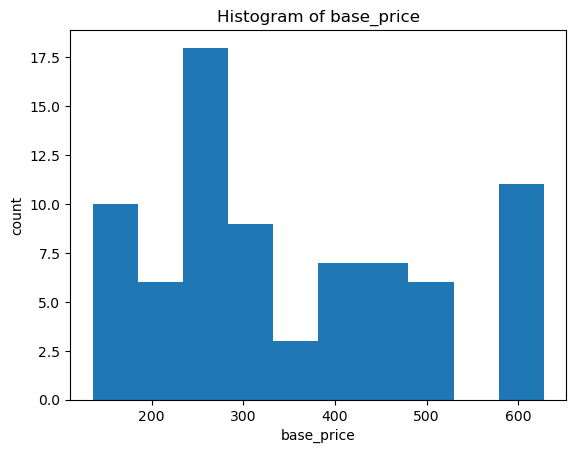

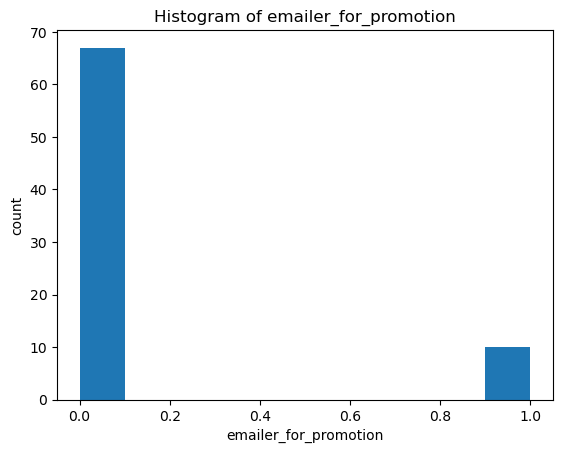

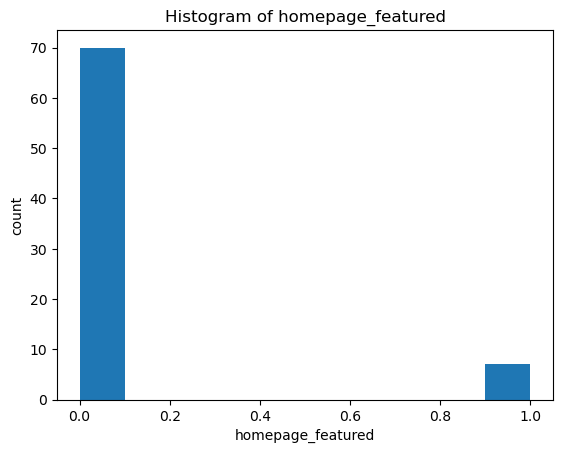

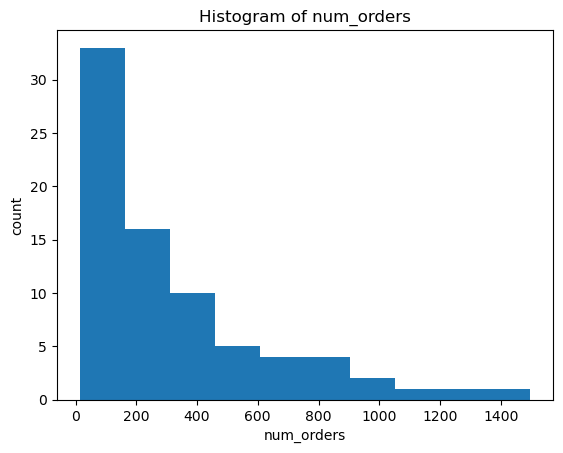

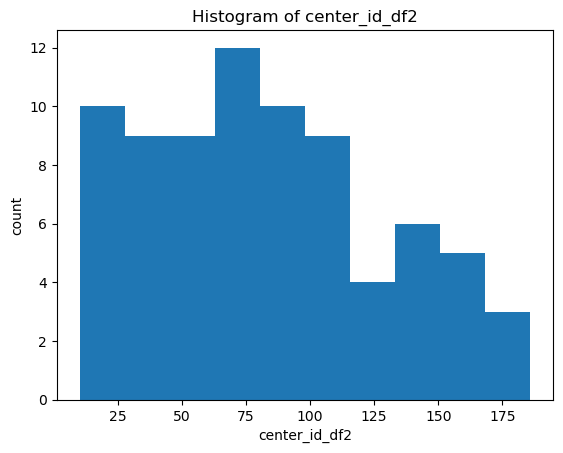

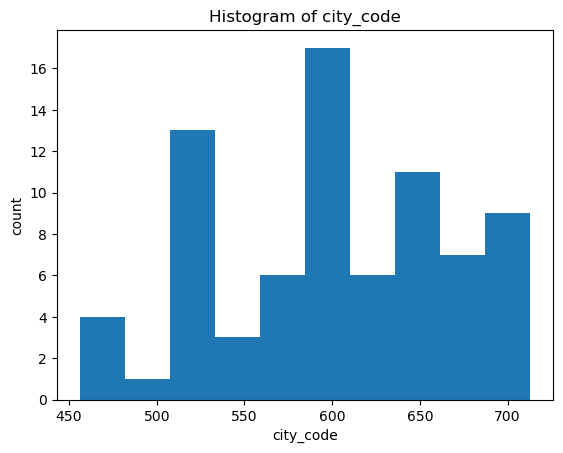

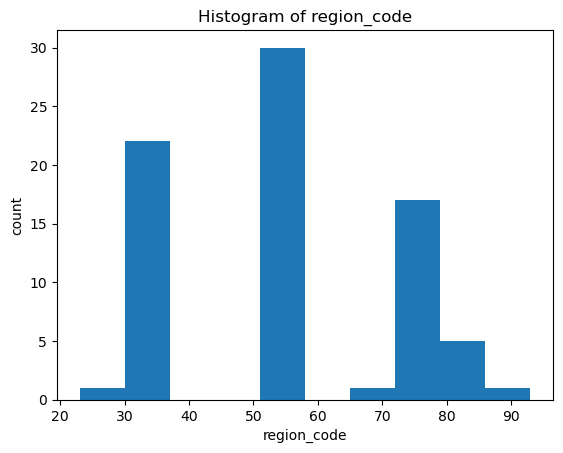

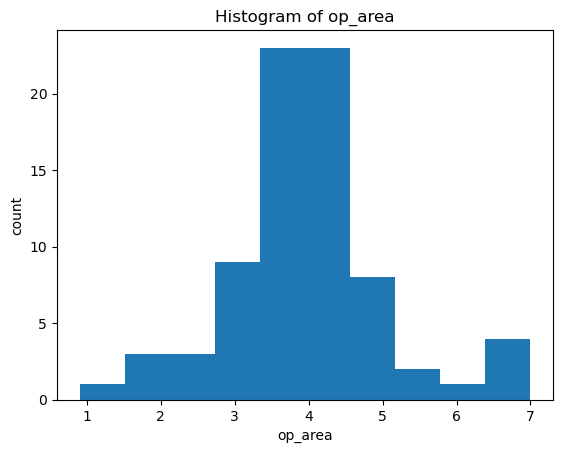

In [31]:
for col in num_cols:
    plt.hist(num_df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title('Histogram of {}'.format(col))
    plt.show()

In [32]:
# The data is skewed 

In [33]:
df_train = pd.concat([num_df,cat_df],axis=1)
df_test = pd.concat([num_df_test,cat_df_test],axis=1)

In [34]:
df_train.head()

,week,center_id_df1,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,center_id_df2,city_code,region_code,op_area,center_type
0,1,55,1885,136.83,152.29,0,0,177,11,679,56,3.7,TYPE_A
1,1,55,1993,136.83,135.83,0,0,270,13,590,56,6.7,TYPE_B
2,1,55,2539,134.86,135.86,0,0,189,124,590,56,4.0,TYPE_C
3,1,55,2139,339.50,437.53,0,0,54,66,648,34,4.1,TYPE_A
4,1,55,2631,243.50,242.50,0,0,40,94,632,34,3.6,TYPE_C


In [35]:
df_test.head()

,week,center_id_df1,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,center_id_df2,city_code,region_code,op_area,center_type
0,146,55,1885,158.11,159.11,0,0,11,679,56,3.7,TYPE_A
1,146,55,1993,160.11,159.11,0,0,13,590,56,6.7,TYPE_B
2,146,55,2539,157.14,159.14,0,0,124,590,56,4.0,TYPE_C
3,146,55,2631,162.02,162.02,0,0,66,648,34,4.1,TYPE_A
4,146,55,1248,163.93,163.93,0,0,94,632,34,3.6,TYPE_C


# Outlier Handling

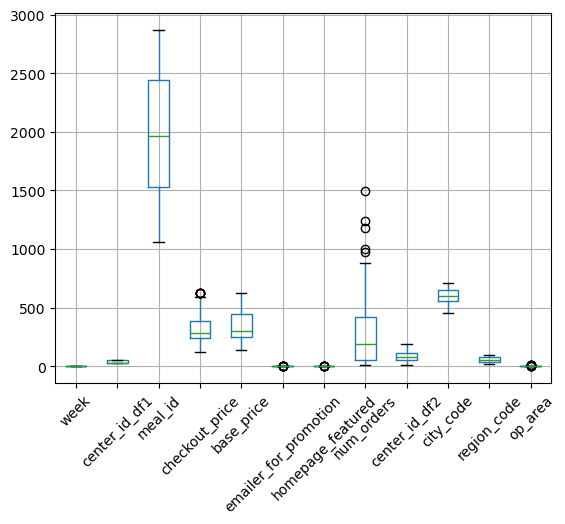

In [37]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

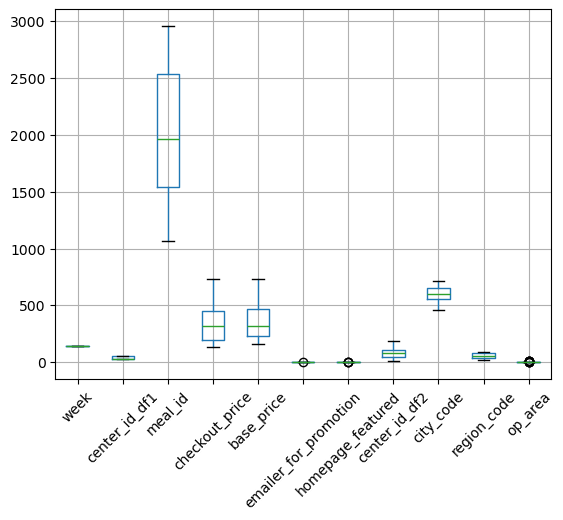

In [38]:
num_df_test.boxplot()
plt.xticks(rotation=45)
plt.show()

In [39]:
def remove_outliers(df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3+1.5*iqr
    lower_bound = q1-1.5*iqr
    df[column_name] = df[column_name].clip(upper = upper_bound)
    df[column_name] = df[column_name].clip(lower = lower_bound)
    return df[column_name]

In [40]:
for col in num_cols:
    num_df[col] = remove_outliers(num_df,col)

In [41]:
for col in num_cols_test:
    num_df_test[col] = remove_outliers(num_df_test,col)

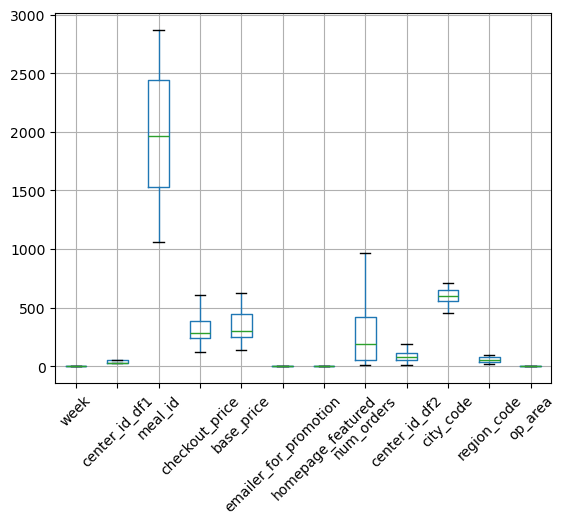

In [42]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

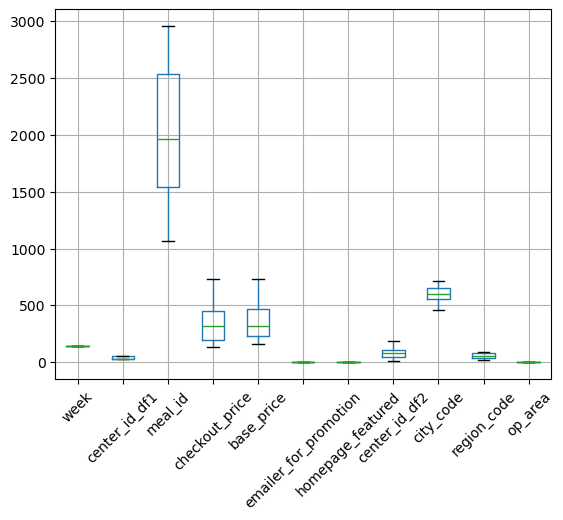

In [43]:
num_df_test.boxplot()
plt.xticks(rotation=45)
plt.show()

# Scaling

In [45]:
min_scaler = MinMaxScaler()
numerical_col2 = ['week','center_id_df1','center_id_df2','meal_id','checkout_price','base_price','emailer_for_promotion','homepage_featured','num_orders']
df_train[numerical_col2] = min_scaler.fit_transform(df_train[numerical_col2])
df_train[numerical_col2]

,week,center_id_df1,center_id_df2,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,0.0,1.0,0.005682,0.455956,0.038007,0.033470,0.0,0.0,0.110438
1,0.0,1.0,0.017045,0.515789,0.038007,0.000000,0.0,0.0,0.173064
2,0.0,1.0,0.647727,0.818283,0.034154,0.000061,0.0,0.0,0.118519
3,0.0,1.0,0.318182,0.596676,0.434451,0.613473,0.0,0.0,0.027609
4,0.0,1.0,0.477273,0.869252,0.246665,0.216902,0.0,0.0,0.018182
...,...,...,...,...,...,...,...,...,...
72,0.0,0.0,0.244318,0.256510,0.248621,0.295858,0.0,0.0,0.319192
73,0.0,0.0,0.113636,0.909695,0.248621,0.293825,0.0,0.0,0.154882
74,0.0,0.0,0.375000,0.792244,0.527425,0.512821,0.0,0.0,0.045791
75,0.0,0.0,0.329545,0.266482,0.717167,0.708026,0.0,0.0,0.063300


In [46]:
min_scaler = MinMaxScaler()
numerical_col2 = ['week','center_id_df1','center_id_df2','meal_id','checkout_price','base_price','emailer_for_promotion','homepage_featured']
df_test[numerical_col2] = min_scaler.fit_transform(df_test[numerical_col2])
df_test[numerical_col2]

,week,center_id_df1,center_id_df2,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,0.0,1.0,0.005682,0.434530,0.037639,0.003448,0.0,0.0
1,0.0,1.0,0.017045,0.491552,0.041014,0.003448,0.0,0.0
2,0.0,1.0,0.647727,0.779831,0.036003,0.003500,0.0,0.0
3,0.0,1.0,0.318182,0.828405,0.044236,0.008541,0.0,0.0
4,0.0,1.0,0.477273,0.098205,0.047458,0.011883,0.0,0.0
...,...,...,...,...,...,...,...,...
72,0.0,0.0,0.244318,0.896515,0.045872,0.147692,0.0,1.0
73,0.0,0.0,0.113636,0.244456,0.310985,0.285252,0.0,0.0
74,0.0,0.0,0.375000,0.866948,0.309298,0.287002,0.0,0.0
75,0.0,0.0,0.329545,0.253960,0.590876,0.572096,0.0,0.0


In [47]:
df_train = df_train.drop(['center_type'],axis=1)
df_test = df_test.drop(['center_type'],axis=1)

# Train Test Split

In [49]:
# Seperating Features and labels
X = df_train.drop(['num_orders'],axis =1)
y = df_train['num_orders']
X_test1 = df_test

In [50]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

# Model Training

## Lasso Regression

In [53]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = Lasso(alpha=0.1)
model.fit(X, y)
y_pred = model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse_poly:}') 

Mean Squared Error (MSE): 0.08644308870500476


## Poisson Regression

In [55]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = PoissonRegressor()
model.fit(X, y)
y_pred = model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse_poly:}') 

Mean Squared Error (MSE): 0.08461599230876246


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\glm.py:283: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


## Ridge Regression

In [57]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)
model.fit(X, y)
y_pred = model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse_poly:}') 

Mean Squared Error (MSE): 0.05044021932744559


## Polynomial Regression

In [59]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error (MSE): {mse_poly:}') 

Mean Squared Error (MSE): 1.7788195245468792


## Linear Regression

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [62]:
# Making Predictions  
y_pred = model.predict(X_test)    

# Calculate evaluation metrics  
mae = mean_absolute_error(y_test, y_pred)  
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

# Print the evaluation metrics  
print(f'Mean Absolute Error (MAE): {mae:.2f}')  
print(f'Mean Squared Error (MSE): {mse:.2f}')  
print(f'R² Score: {r2:.2f}')

Mean Absolute Error (MAE): 0.16
Mean Squared Error (MSE): 0.06
R² Score: 0.28


## Saving Results

In [64]:
result_df = pd.DataFrame(y_pred)
result_df

,0
0,0.179071
1,0.261092
2,0.434973
3,0.159495
4,0.222056
5,0.294292
6,0.168971
7,0.121331
8,0.237231
9,0.048938


In [65]:
id_series = pd.Series(id)
result_df = pd.concat([id_series,result_df],axis = 1)
result_df.rename(columns={0 : 'num_orders'}, inplace=True)

In [66]:
result_df = result_df.iloc[:,-1:2]

In [67]:
result_df

,num_orders
0,0.179071
1,0.261092
2,0.434973
3,0.159495
4,0.222056
5,0.294292
6,0.168971
7,0.121331
8,0.237231
9,0.048938


In [68]:
result_df.to_csv("C:\\Users\\user\\Downloads\\submission file.csv")